In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors
import gsw as gsw
import os

# IMPORT DATA

In [18]:
# Import all temp csv's from 1st deployment
temp2ma = pd.read_csv('Temperature/21444948-7.csv', header=1)
temp2mb = pd.read_csv('Temperature/21444948-7_823.csv', header=1)
temp2m = pd.merge(temp2ma, temp2mb, how='outer')
temp4m = pd.read_csv('Temperature/20235430-2_823.csv', header=1)
temp6m = pd.read_csv('Temperature/21444947-6.csv', header=1)
temp8m = pd.read_csv('Temperature/21444950-5_823.csv', header=1)
temp91m = pd.read_csv('Temperature/21444949-3_823.csv', header=1)
temp94m = pd.read_csv('Temperature/20235428-1_823.csv', header=1)
temp97m = pd.read_csv('Temperature/21444951-4_823.csv', header=1)

In [57]:
#4m, 2m, 6m, 8m, 9.1m, 9.4m, 9.7m
# Merge all seperate temperature depths (after some editing of columns names in excel)
# Has to be done in desired depth order to merge on inconsistent datetimes
temp_all = pd.merge(temp_all, temp97m, how='outer', on='Date Time')

In [65]:
# Export 1st deployment
temp_all = pd.to_csv('Temperature/temp_all.csv', index = False)
temp_all

,Date Time,2m,4m,6m,8m,9.1m,9.4m,9.7m
0,7/21/2022 13:00,21.604,21.748,20.889,25.186,21.127,20.412,20.341
1,7/21/2022 13:01,18.794,21.628,20.698,25.016,20.936,20.269,20.174
2,7/21/2022 13:02,11.832,21.509,20.507,24.823,20.770,20.126,20.007
3,7/21/2022 13:03,11.662,21.390,20.317,24.677,20.531,19.984,19.865
4,7/21/2022 13:04,11.419,21.223,20.126,24.460,20.341,19.817,19.746
...,...,...,...,...,...,...,...,...
47505,8/23/2022 12:42,19.888,NaN,NaN,NaN,NaN,NaN,NaN
47506,8/23/2022 12:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47507,8/23/2022 12:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47508,8/23/2022 12:43,19.817,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Do the same thing with 2nd deployment csv's
temp2m_b = pd.read_csv('Temperature/21444948-7_909.csv', header=1)
temp4m_b = pd.read_csv('Temperature/20235430-2_909.csv', header=1)
temp6m_b = pd.read_csv('Temperature/21444947-6_909.csv', header=1)
temp8m_b = pd.read_csv('Temperature/21444950-5_909.csv', header=1)
temp91m_b = pd.read_csv('Temperature/21444949-3_909.csv', header=1)
temp94m_b = pd.read_csv('Temperature/20235428-1_909.csv', header=1)
temp97m_b = pd.read_csv('Temperature/21444951-4_909.csv', header=1)

In [54]:
temp_b = pd.merge(temp_b, temp97m_b, how='outer', on='Date Time', suffixes=('_9.4m','_9.7m'))

In [57]:
# For merge of 1st and 2nd deployment, column names need to be identical
temp_b = temp_b.drop(columns=['#_2m', '#_4m', '#_6m', '#_8m', '#_9.1m', '#_9.4m', '#' ])
temp_b = tempb.rename(columns={'Temp_2m':'2m', 'Temp_4m':'4m', 'Temp_6m':'6m', 'Temp_8m':'8m', 'Temp_9.1m':'9.1m', 'Temp_9.4m':'9.4m', 'Temp_9.7m':'9.7m', })

In [17]:
# Export merged csv for 2nd deployment
temp_b.to_csv('Temperature/temp_b.csv', index = False)

### For reimporting both datasets

In [ ]:
temp1 = pd.read_csv('Temperature/temp_all.csv')

temp2 = pd.read_csv('Temperature/temp_b.csv')

In [35]:
# Merge both datasets chronologically
temp = temp1.append(temp2)

In [196]:
# Convert datetime to pandas datetime class for easier plotting
temp['Date Time'] = pd.to_datetime(temp['Date Time'])

# QUALITY CONTROL/ORGANIZATION

Deployment and retrieval temperatures skew the data to higher than normal values and must be removed

In [156]:
# Remove rows: 0-78, 504-578(2m only), 35640-35647(2m only), 35734-47518( 6m only) ,47466-47516, 70412-76584

# At these rows, only 2m and 6m data is affected, and so they are converted to NaN's rather than deleting the good data from the other depths
# This is done first since removing the rows also affects the dataframe index
temp.iloc[35640:35724, 1] = 'NaN'
temp.iloc[35732:47519, 3] = 'NaN'

# All depths of data are skewed at these points, so these entire rows are removed
temp = temp.drop(range(0,579,1), axis=0)
temp = temp.drop(range(47466,47530,1), axis=0)
temp = temp.drop(range(70404,76584,1), axis=0)

(10.0, 17.0)

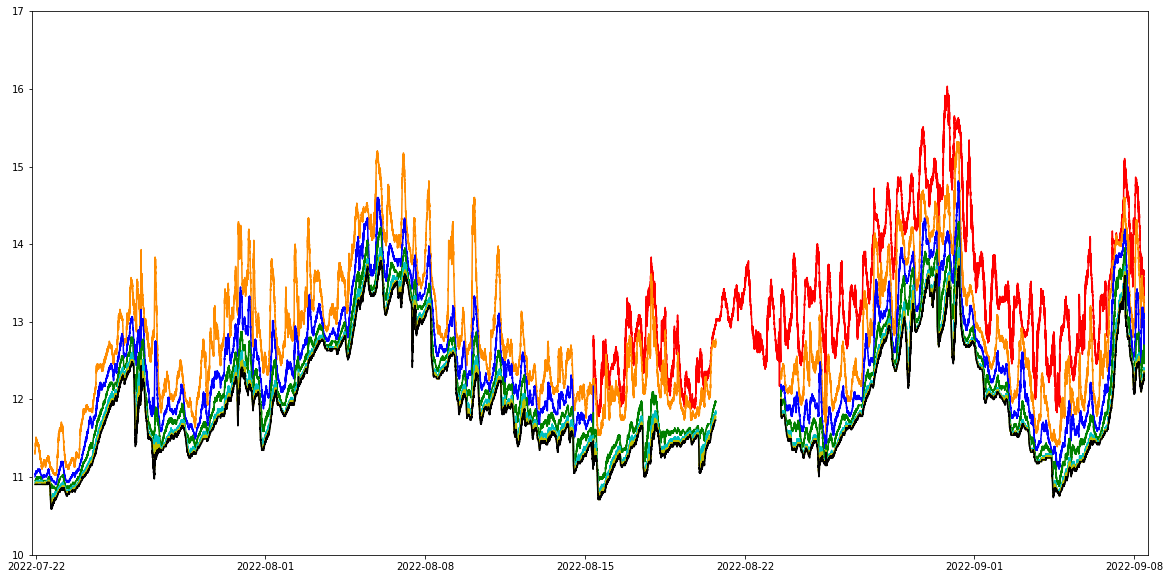

In [5]:
# Check that entire dataset is consistent
plt.figure(figsize = (20, 10))
plt.plot(temp['Date Time'], temp['2m'], '-r')
plt.plot(temp['Date Time'], temp['4m'], 'darkorange')
plt.plot(temp['Date Time'], temp['6m'], '-b')
plt.plot(temp['Date Time'], temp['8m'], '-g')
plt.plot(temp['Date Time'], temp['9.1m'], '-c')
plt.plot(temp['Date Time'], temp['9.4m'], '-y')
plt.plot(temp['Date Time'], temp['9.7m'], '-k')
plt.xlim([19194.8,19243.6])
plt.ylim([10, 17])

In [195]:
# Export to a final, merged and quality controlled csv file
temp.to_csv('Temperature/temp_qc.csv', index = False)

### Converting the dataframe to xarray dataset

For future analysis with Richardson number and temperature change with depth over time, it will be more convenient for data to be in matrix form

In [13]:
temp = pd.read_csv('Temperature/temp_qc.csv')
time = pd.to_datetime(temp['Date Time'])
time

0       2022-07-21 22:39:00
1       2022-07-21 22:40:00
2       2022-07-21 22:41:00
3       2022-07-21 22:42:00
4       2022-07-21 22:43:00
                ...        
69756   2022-09-08 10:29:00
69757   2022-09-08 10:30:00
69758   2022-09-08 10:31:00
69759   2022-09-08 10:32:00
69760   2022-09-08 10:33:00
Name: Date Time, Length: 69761, dtype: datetime64[ns]

In [21]:
# Create two dimensional temperature matrix
temp_m = temp.iloc[:,1:] # Take only the temperature data since datetime is a coordinate now
temp_m = temp_m.to_numpy() # Convert columns of data into numpy matrix
temp_m = temp_m.T # Transpose matrix so that it's in more visualizable form (depth on y-axis, time on x-axis)

# create coords of dataset
rows = [2,4,6,8,9.1,9.4,9.7] # the depths of the temp loggers
cols = test # Time variable

# put data into a dataset
temp_ds = xr.Dataset(
    data_vars=dict(
        Temperature = (["depth", "time"], temp_m),
    ),
    coords=dict(
        dcell=(["depth"], rows),
        time=(["time"], cols),
    ),
    attrs=dict(description="Temperature of water column over time"),
)

In [23]:
temp_ds

<xarray.Dataset>
Dimensions:      (depth: 7, time: 69761)
Coordinates:
    dcell        (depth) float64 2.0 4.0 6.0 8.0 9.1 9.4 9.7
  * time         (time) datetime64[ns] 2022-07-21T22:39:00 ... 2022-09-08T10:...
Dimensions without coordinates: depth
Data variables:
    Temperature  (depth, time) float64 nan nan nan nan ... 12.32 12.32 12.34
Attributes:
    description:  Temperature of water column over time

# SeaPHOX data

In [2]:
# Creates a string for the filepath for ADCP data
path = 'SeaPHOX/'
files = os.listdir(path)

# Creates a list of filenames where the first filename in the '21m' directory is omitted
file_len = list(range(1, len(files)))

# Creates dataframe 'df1' with the first raw data table in the directory
# The first file is the first month(s) of data, and serves as a starting point to merge the future data with
df1 = pd.read_csv((str(path) + str(files[0])), skiprows = 4, parse_dates=[[0,1]])

# A for loop which reads the raw data files in chronological order then creates a new dataframe called 'df2'
# df1 is appended with df2, and the loop continues until all data files are appended to df1
for val in file_len:
    df2 = pd.read_csv((str(path) + str(files[val])), skiprows = 4, parse_dates=[[0,1]])
    df1 = df1.append(df2, ignore_index=True)

# With the new, completely merged dataframe, each column is properly renamed, a redundant column known as 'unknown' is removed, and all
# data that exceeds a depth of 22 (the max depth of the adcp) is removed
df1 = df1.rename(columns = {'Date_UTC_Time_UTC':'datetime'})
df1.datetime = pd.to_datetime(df1.datetime)

ds = xr.Dataset(coords={'time': df1['datetime'].values})
for var in df1.columns[1:]:
    vardata = np.float64(df1[var].values)
    ds[var] = (['time'],vardata)
ds['Depth'].attrs['Units'] = 'Feet'
ds['Temperature'].attrs['Units'] = 'Celsius (C)'
ds['OxyUM'].attrs['Units'] = 'MicroMol (UM)'
ds['OxymgL'].attrs['Units'] = 'Milligrams per Liter (mg/L)'
ds['Sal'].attrs['Units'] = 'PSU'
ds['Sal'].attrs['Description'] = 'Practical salinity converted from the conductivity recorded by the instrument.'
ds['QC'].attrs['Flag values'] = '1: Pass, 2: Not evaluated, 3: Suspect, 4: Fail'
ds['QC'].attrs['Description'] = 'Flag score following QARTOD protocol.'
ds.attrs['Title'] = 'StillwaterData'
ds.attrs['Original creator'] = 'Emily Donham'
ds.attrs['Creator contact information'] = 'edonham@ucsb.edu'
ds.attrs['Site'] = 'Stillwater Cove (SWC)'
ds.attrs['Sensor'] = 'SAT333 (SeaPHOX)'
ds.attrs['Sample frequency'] = '15 minutes'

# Calculating in-situ density
ds['Pressure'] = (['time'], ds.Depth / 3.281) # Converts the depth recorded from the dataset to pressure
ds['Pressure'].attrs['Units'] = 'dBar'

# Salinity is PSU, but GSW requires absolute salinity for calculating CT and rho
ds['SA'] = (['time'], gsw.conversions.SA_from_SP(ds.Sal, ds.Pressure, -121.941750, 36.561972)) # Uses pressure, psu, and lat/lon of SWC to calculate absolute salinity
ds['SA'].attrs['Units'] = 'Absolute salinity (g/kg)'
ds['SA'].attrs['Description'] = 'Absolute salinity calculated from in-situ practical salinity using gsw.conversion.SA_from_SP().'

ds['CT'] = (['time'], gsw.conversions.CT_from_t(ds.SA, ds.Temperature, ds.Pressure)) # Use SA and pressure to calculate conservative temperature
ds['CT'].attrs['Units'] = 'Celsuis (C)'
ds['CT'].attrs['Description'] = 'Conservative temperature (ITS-90) calculated from in-situ temperature using gsw.conversion.CT_from_t().'

rho, alpha, beta = gsw.density.rho_alpha_beta(ds.SA, ds.CT, ds.Pressure) 
ds['Density'] = (['time'], rho - 1000)
ds['Density'].attrs['Units'] = 'kg/m3'
ds['Density'].attrs['Description'] = 'In-situ density calculated from salinity, conservative temperature, and pressure using gsw.density.rho_alpha_beta().'
ds['Alpha'] = (['time'], alpha)
ds['Alpha'].attrs['Units'] = '1/K'
ds['Alpha'].attrs['Description'] = 'Thermal expansion coefficient with respect to conservative temperature.'
ds['Beta'] = (['time'], beta)
ds['Beta'].attrs['Units'] = 'kg/g'
ds['Beta'].attrs['Description'] = 'Saline contraction coefficient at constant conservative temperature.'

ds

<xarray.Dataset>
Dimensions:      (time: 103515)
Coordinates:
  * time         (time) datetime64[ns] 2016-02-25T10:30:00 ... 2020-10-15T13:...
Data variables:
    Depth        (time) float64 30.0 30.0 30.0 30.0 30.0 ... 40.0 40.0 40.0 40.0
    Temperature  (time) float64 13.22 13.23 13.24 13.22 ... 11.31 11.22 11.27
    pH_int       (time) float64 7.82 7.82 7.82 7.82 7.82 ... 7.84 7.83 7.82 7.83
    pH_extT      (time) float64 nan nan nan nan nan ... 7.85 7.84 7.83 7.82 7.83
    pH_extF      (time) float64 nan nan nan nan nan ... 7.85 7.84 7.83 7.82 7.83
    OxyUM        (time) float64 nan nan nan nan nan ... 169.8 164.2 159.8 164.7
    OxymgL       (time) float64 nan nan nan nan nan ... 5.38 5.31 5.13 5.0 5.15
    Sal          (time) float64 nan nan nan nan nan ... 31.67 31.66 31.68 31.65
    QC           (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    Pressure     (time) float64 9.144 9.144 9.144 9.144 ... 12.19 12.19 12.19
    SA           (time) float64 nan nan nan nan nan ... 31.82 31.81 31.83 31.8
    CT           (time) float64 nan nan nan nan nan ... 11.48 11.36 11.27 11.32
    Density      (time) float64 nan nan nan nan nan ... 24.17 24.18 24.21 24.18
    Alpha        (time) float64 nan nan nan ... 0.0001725 0.0001716 0.0001721
    Beta         (time) float64 nan nan nan ... 0.0007517 0.0007519 0.0007518
Attributes:
    Title:                        StillwaterData
    Original creator:             Emily Donham
    Creator contact information:  edonham@ucsb.edu
    Site:                         Stillwater Cove (SWC)
    Sensor:                       SAT333 (SeaPHOX)
    Sample frequency:             15 minutes

In [3]:
ds.to_netcdf('SeaPHOX/seaphox.nc')